In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/dhwanibhavankar/Desktop/SML_Project/Final_features/POLY_Final.csv")

In [3]:
df.set_index("File Names", inplace=True)

In [4]:
df.head()

,Label,0,1,2,3,4,5,6,7,8,...,206,207,208,209,210,211,212,213,214,215
File Names,,,,,,,,,,,,,,,,,,,,,
102_1b1_Ar_sc_Meditron.wav,Healthy,0.499199,0.498814,0.499197,0.499708,0.499522,0.499503,0.499562,0.499629,0.499631,...,0.499821,0.499817,0.499699,0.499696,0.499773,0.499668,0.499632,0.499612,0.499632,0.499522
103_2b2_Ar_mc_LittC2SE.wav,Asthma,0.492964,0.487198,0.488172,0.493679,0.491500,0.495072,0.494329,0.497212,0.497799,...,0.495289,0.497013,0.493974,0.494386,0.497474,0.495801,0.497262,0.498159,0.497362,0.496742
104_1b1_Al_sc_Litt3200.wav,COPD,0.498614,0.498077,0.497587,0.498315,0.498730,0.497496,0.498075,0.499257,0.499070,...,0.490369,0.491668,0.495533,0.496082,0.496994,0.498456,0.498204,0.498000,0.497034,0.496449
104_1b1_Ar_sc_Litt3200.wav,COPD,0.498599,0.498499,0.498997,0.499365,0.499330,0.499465,0.498800,0.497389,0.496634,...,0.496671,0.496664,0.497347,0.497620,0.498523,0.499225,0.499302,0.499425,0.499492,0.499507
104_1b1_Ll_sc_Litt3200.wav,COPD,0.498311,0.498319,0.497529,0.496479,0.497214,0.497683,0.498545,0.499343,0.499490,...,0.499662,0.499639,0.499624,0.499704,0.499804,0.499813,0.499721,0.499558,0.499608,0.499565


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Label'])
y = df['Label']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize classifiers
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train the classifiers
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Evaluate KNN
print("KNN:")
y_pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Evaluate Naive Bayes
print("Naive Bayes:")
y_pred_nb = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Evaluate Decision Tree
print("Decision Tree:")
y_pred_dt = decision_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Evaluate Random Forest
print("Random Forest:")
y_pred_rf = random_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

KNN:
[[ 12   4   1   0]
 [  0 164   2   0]
 [  4   9   9   0]
 [  2   9   1   0]]
              precision    recall  f1-score   support

      Asthma       0.67      0.71      0.69        17
        COPD       0.88      0.99      0.93       166
     Healthy       0.69      0.41      0.51        22
   Pneumonia       0.00      0.00      0.00        12

    accuracy                           0.85       217
   macro avg       0.56      0.53      0.53       217
weighted avg       0.80      0.85      0.82       217

Naive Bayes:
[[ 12   0   4   1]
 [  0 164   0   2]
 [  2   5  15   0]
 [  2   8   2   0]]
              precision    recall  f1-score   support

      Asthma       0.75      0.71      0.73        17
        COPD       0.93      0.99      0.96       166
     Healthy       0.71      0.68      0.70        22
   Pneumonia       0.00      0.00      0.00        12

    accuracy                           0.88       217
   macro avg       0.60      0.59      0.60       217
weighted avg 

/Users/dhwanibhavankar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhwanibhavankar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhwanibhavankar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [9]:
df['Label'].value_counts()

COPD         793
Healthy      140
Asthma       100
Pneumonia     52
Name: Label, dtype: int64

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [12]:
df = pd.read_csv("/Users/dhwanibhavankar/Desktop/SML_Project/Final_features/POLY_Final.csv")

In [13]:
# Split features and target variable
X = df.drop(columns=["Label", "File Names"])
y = df["Label"]

In [14]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Apply Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Evaluate the initial model
y_pred = random_forest.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred))

Initial Model Performance:
              precision    recall  f1-score   support

      Asthma       1.00      1.00      1.00        17
        COPD       0.93      0.99      0.96       166
     Healthy       0.85      0.77      0.81        22
   Pneumonia       1.00      0.17      0.29        12

    accuracy                           0.93       217
   macro avg       0.94      0.73      0.76       217
weighted avg       0.93      0.93      0.91       217



In [9]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("/Users/dhwanibhavankar/Desktop/SML_Project/Final_features/POLY_Final.csv")

In [3]:
# Split features and target variable
X = df.drop(columns=["Label", "File Names"])
y = df["Label"]

In [4]:
# Initialize a RandomForestClassifier
random_forest = RandomForestClassifier()

In [5]:
# Initialize StratifiedKFold with desired number of folds
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [6]:
# Initialize lists to store evaluation metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [7]:
# Iterate over each fold
for train_index, test_index in stratified_kfold.split(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    random_forest.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    y_pred = random_forest.predict(X_test)
    
    # Calculate evaluation metrics and store them
    accuracy_scores.append(random_forest.score(X_test, y_test))
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

In [8]:
# Compute average evaluation metrics across folds
avg_accuracy = sum(accuracy_scores) / k_folds
avg_precision = sum(precision_scores) / k_folds
avg_recall = sum(recall_scores) / k_folds
avg_f1 = sum(f1_scores) / k_folds

# Print the average evaluation metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)

Average Accuracy: 0.9124423963133641
Average Precision: 0.9158937280087068
Average Recall: 0.9124423963133641
Average F1-score: 0.8969389152271481


In [10]:
# Iterate over each fold
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Split the dataset into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    random_forest.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    y_pred = random_forest.predict(X_test)
    
    # Print the classification report for the current fold
    print(f"Classification Report for Fold {fold}:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Classification Report for Fold 1:
              precision    recall  f1-score   support

      Asthma       1.00      0.75      0.86        20
        COPD       0.91      1.00      0.95       159
     Healthy       0.79      0.68      0.73        28
   Pneumonia       1.00      0.30      0.46        10

    accuracy                           0.90       217
   macro avg       0.93      0.68      0.75       217
weighted avg       0.91      0.90      0.89       217

--------------------------------------------------
Classification Report for Fold 2:
              precision    recall  f1-score   support

      Asthma       0.91      1.00      0.95        20
        COPD       0.93      1.00      0.96       159
     Healthy       0.96      0.79      0.86        28
   Pneumonia       1.00      0.10      0.18        10

    accuracy                           0.93       217
   macro avg       0.95      0.72      0.74       217
weighted avg       0.93      0.93      0.91       217

-----------

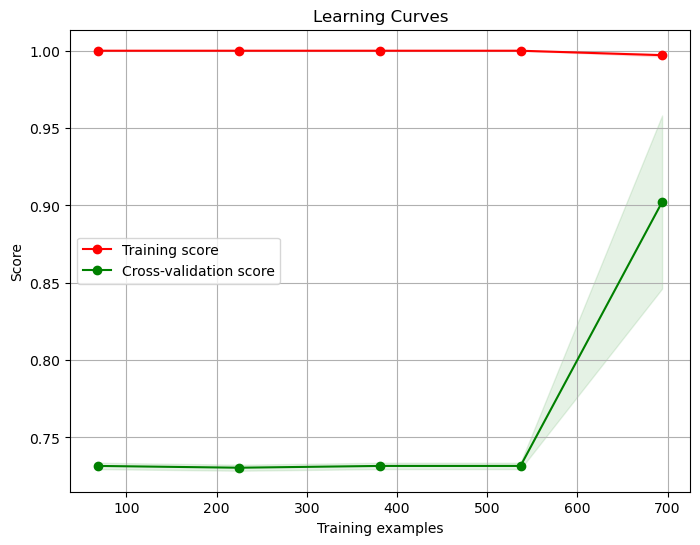

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage
title = "Learning Curves"
plot_learning_curve(random_forest, title, X_train, y_train, cv=5)
plt.show()


In [16]:
class_labels = ['Asthma','COPD','Healthy','Pneumonia']

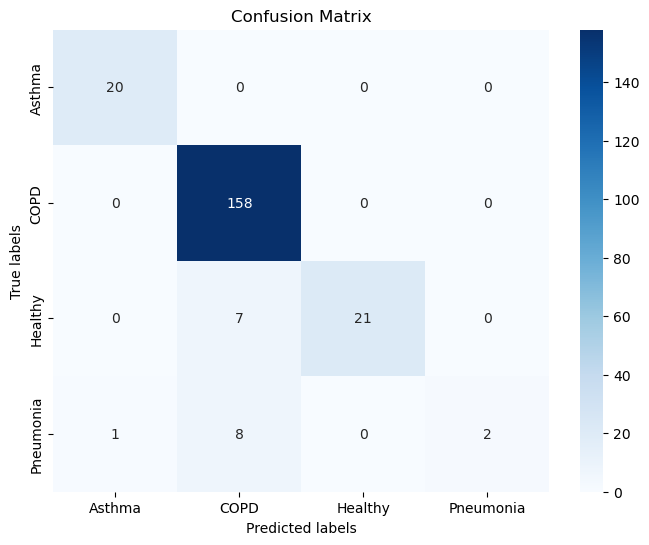

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained your model and named it 'model'
y_pred = random_forest.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [18]:
df['Label'].value_counts()

COPD         793
Healthy      140
Asthma       100
Pneumonia     52
Name: Label, dtype: int64

In [19]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X contains your features and y contains your target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

# Predict on the test set
y_pred = brf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Asthma       0.89      1.00      0.94        17
        COPD       1.00      0.87      0.93       166
     Healthy       0.72      0.82      0.77        22
   Pneumonia       0.38      0.92      0.54        12

    accuracy                           0.88       217
   macro avg       0.75      0.90      0.79       217
weighted avg       0.93      0.88      0.89       217



/Users/dhwanibhavankar/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/dhwanibhavankar/anaconda3/lib/python3.10/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/dhwanibhavankar/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/dhwanibhavankar/anaconda3/lib/

In [22]:
df.head()

,File Names,Label,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,102_1b1_Ar_sc_Meditron.wav,Healthy,0.499199,0.498814,0.499197,0.499708,0.499522,0.499503,0.499562,0.499629,...,0.499821,0.499817,0.499699,0.499696,0.499773,0.499668,0.499632,0.499612,0.499632,0.499522
1,103_2b2_Ar_mc_LittC2SE.wav,Asthma,0.492964,0.487198,0.488172,0.493679,0.491500,0.495072,0.494329,0.497212,...,0.495289,0.497013,0.493974,0.494386,0.497474,0.495801,0.497262,0.498159,0.497362,0.496742
2,104_1b1_Al_sc_Litt3200.wav,COPD,0.498614,0.498077,0.497587,0.498315,0.498730,0.497496,0.498075,0.499257,...,0.490369,0.491668,0.495533,0.496082,0.496994,0.498456,0.498204,0.498000,0.497034,0.496449
3,104_1b1_Ar_sc_Litt3200.wav,COPD,0.498599,0.498499,0.498997,0.499365,0.499330,0.499465,0.498800,0.497389,...,0.496671,0.496664,0.497347,0.497620,0.498523,0.499225,0.499302,0.499425,0.499492,0.499507
4,104_1b1_Ll_sc_Litt3200.wav,COPD,0.498311,0.498319,0.497529,0.496479,0.497214,0.497683,0.498545,0.499343,...,0.499662,0.499639,0.499624,0.499704,0.499804,0.499813,0.499721,0.499558,0.499608,0.499565


In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the dataset
# Drop any non-numeric columns and encode the target variable
X = df.drop(columns=['Label'])
y = df['Label']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Perform data augmentation
X_augmented, y_augmented = smote.fit_resample(X, y)

# Convert augmented data back to DataFrame if needed
df_augmented = pd.concat([pd.DataFrame(X_augmented, columns=X.columns), pd.Series(y_augmented, name='Label')], axis=1)

# Check the distribution of classes after augmentation
print(df_augmented['Label'].value_counts())


ValueError: could not convert string to float: '102_1b1_Ar_sc_Meditron.wav'

In [24]:
df.columns

Index(['File Names', 'Label', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '206', '207', '208', '209', '210', '211', '212', '213', '214', '215'],
      dtype='object', length=218)

In [25]:
df.head()

,File Names,Label,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,102_1b1_Ar_sc_Meditron.wav,Healthy,0.499199,0.498814,0.499197,0.499708,0.499522,0.499503,0.499562,0.499629,...,0.499821,0.499817,0.499699,0.499696,0.499773,0.499668,0.499632,0.499612,0.499632,0.499522
1,103_2b2_Ar_mc_LittC2SE.wav,Asthma,0.492964,0.487198,0.488172,0.493679,0.491500,0.495072,0.494329,0.497212,...,0.495289,0.497013,0.493974,0.494386,0.497474,0.495801,0.497262,0.498159,0.497362,0.496742
2,104_1b1_Al_sc_Litt3200.wav,COPD,0.498614,0.498077,0.497587,0.498315,0.498730,0.497496,0.498075,0.499257,...,0.490369,0.491668,0.495533,0.496082,0.496994,0.498456,0.498204,0.498000,0.497034,0.496449
3,104_1b1_Ar_sc_Litt3200.wav,COPD,0.498599,0.498499,0.498997,0.499365,0.499330,0.499465,0.498800,0.497389,...,0.496671,0.496664,0.497347,0.497620,0.498523,0.499225,0.499302,0.499425,0.499492,0.499507
4,104_1b1_Ll_sc_Litt3200.wav,COPD,0.498311,0.498319,0.497529,0.496479,0.497214,0.497683,0.498545,0.499343,...,0.499662,0.499639,0.499624,0.499704,0.499804,0.499813,0.499721,0.499558,0.499608,0.499565


In [26]:
df['Label'].value_counts()

COPD         793
Healthy      140
Asthma       100
Pneumonia     52
Name: Label, dtype: int64

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [29]:
# Augment Pneumonia class to 75 instances
pneumonia_data = df[df['Label'] == 'Pneumonia']
pneumonia_augmented = pneumonia_data.sample(n=75 - len(pneumonia_data), replace=True)
df = pd.concat([df, pneumonia_augmented])

In [30]:
df['Label'].value_counts()

COPD         793
Healthy      140
Asthma       100
Pneumonia     75
Name: Label, dtype: int64

In [32]:
# Split the data into features and labels
X = df.drop(['File Names', 'Label'], axis=1)  # Features
y = df['Label']  # Labels

In [34]:
# Convert categorical labels into numerical values
y = pd.factorize(y)[0]

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions
predictions = rf_classifier.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       1.00      0.88      0.94        17
           2       0.93      1.00      0.96       162
           3       1.00      0.58      0.74        12

    accuracy                           0.94       222
   macro avg       0.96      0.81      0.87       222
weighted avg       0.94      0.94      0.93       222



In [40]:
from sklearn.metrics import accuracy_score

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on training set
train_predictions = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on test set
test_predictions = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9977426636568849
Test Accuracy: 0.9369369369369369


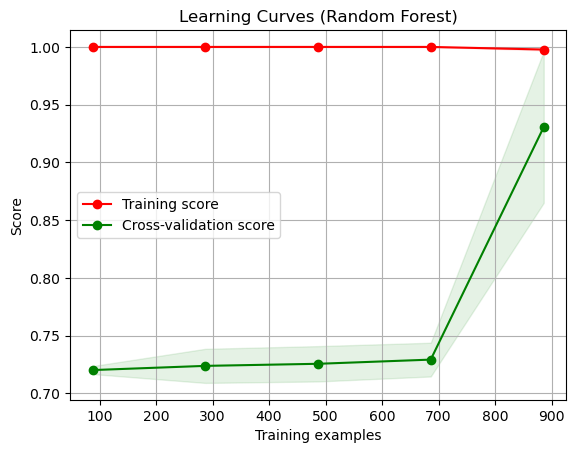

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest)"
cv = 5  # Cross-validation folds
plot_learning_curve(rf_classifier, title, X, y, cv=cv, n_jobs=-1)

plt.show()


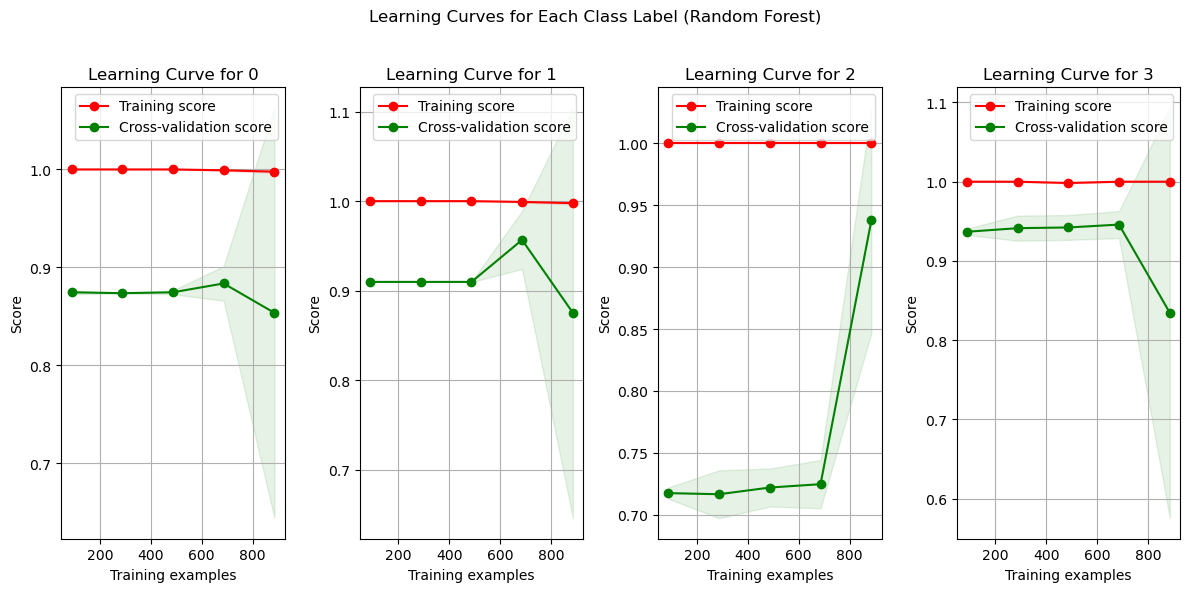

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

def plot_learning_curves_for_classes(estimator, title, X, y, classes, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate learning curves for each class label.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    classes : array-like, shape (n_classes,)
        Unique class labels.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(12, 6))
    for idx, class_label in enumerate(classes):
        plt.subplot(1, len(classes), idx + 1)
        plt.title(f"Learning Curve for {class_label}")
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, (y == class_label).astype(int), cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")

    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Plot learning curves for each class label
title = "Learning Curves for Each Class Label (Random Forest)"
classes = np.unique(y)
cv = 5  # Cross-validation folds
plot_learning_curves_for_classes(rf_classifier, title, X, y, classes, cv=cv, n_jobs=-1)


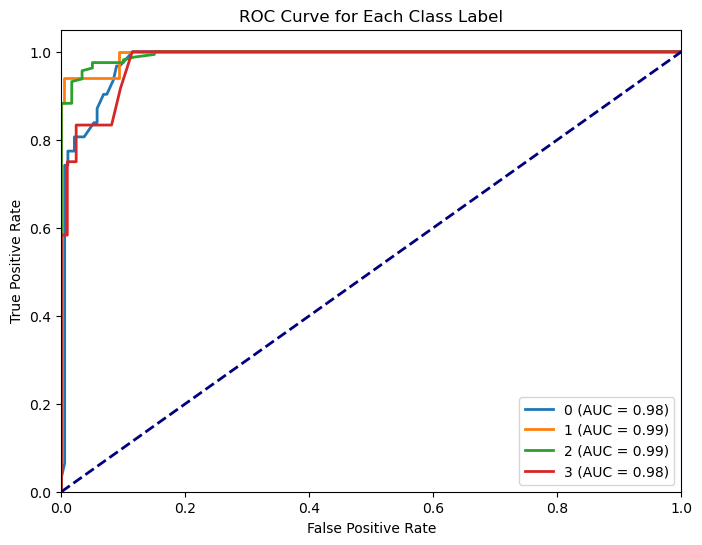

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_for_classes(estimator, X, y, classes):
    plt.figure(figsize=(8, 6))

    for idx, class_label in enumerate(classes):
        # Convert class labels to binary format (1 for the current class, 0 for others)
        y_binary = (y == class_label).astype(int)

        # Predict probabilities for the positive class
        y_score = estimator.predict_proba(X)[:, idx]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_binary, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{class_label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class Label')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each class label
plot_roc_curve_for_classes(rf_classifier, X_test, y_test, classes)


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [46]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print("K-Nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, knn_predictions))

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

K-Nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.42      0.55        31
           1       0.69      0.53      0.60        17
           2       0.86      0.99      0.92       162
           3       0.38      0.25      0.30        12

    accuracy                           0.83       222
   macro avg       0.69      0.55      0.59       222
weighted avg       0.82      0.83      0.81       222


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.56      0.53      0.55        17
           2       0.91      0.99      0.95       162
           3       0.20      0.08      0.12        12

    accuracy                           0.85       222
   macro avg       0.60      0.55      0.56       222
weighted avg       0.82      0.85      0.83       222


Decision Tree Classification Report:
       